<a href="https://colab.research.google.com/github/dprincef/S-N-Assignments/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_csv('Ecommerce Customers (1)')

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


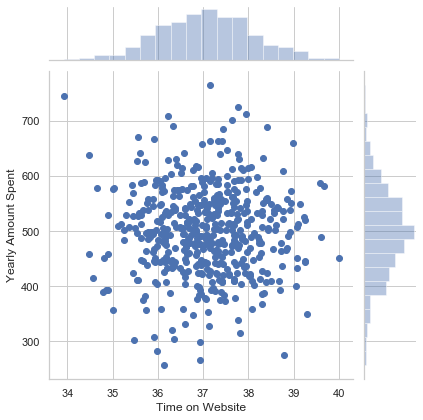

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot('Time on Website','Yearly Amount Spent',customers)

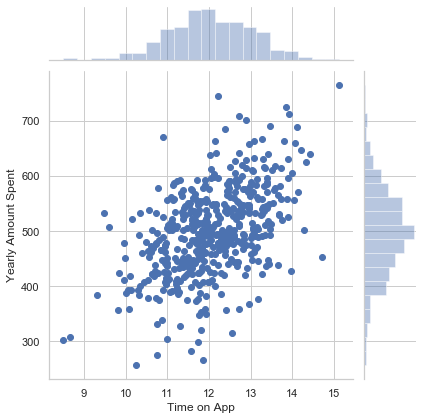

In [ ]:
sns.jointplot('Time on App','Yearly Amount Spent',customers)

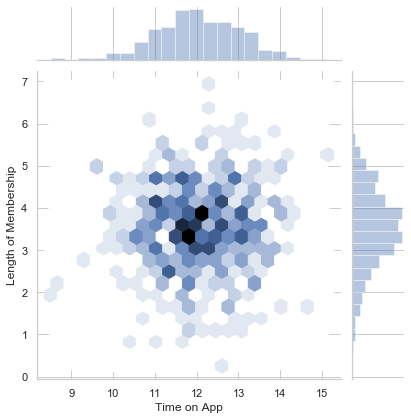

In [ ]:
sns.jointplot('Time on App','Length of Membership',customers,kind='hex')

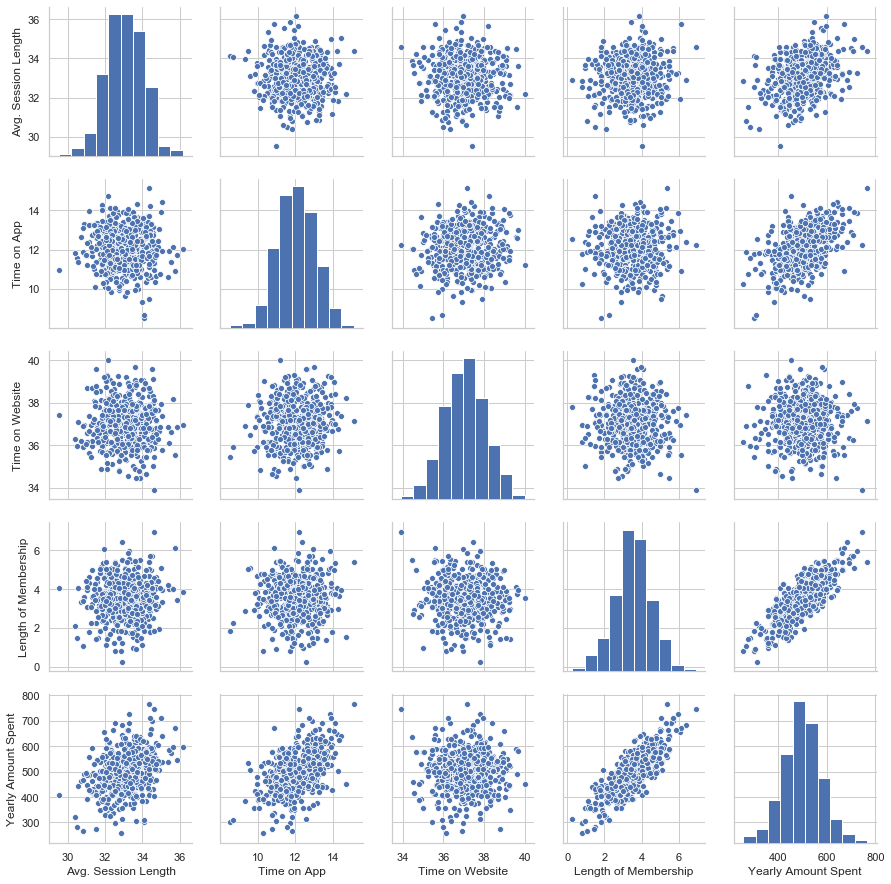

In [ ]:
sns.pairplot(customers)

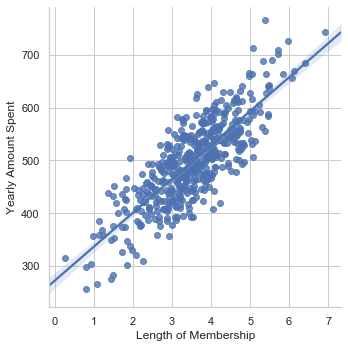

In [ ]:
sns.lmplot(y= 'Yearly Amount Spent', x = 'Length of Membership',data=customers)

In [ ]:
X = customers.drop(['Email','Address','Avatar',"Yearly Amount Spent"],axis=1)

In [ ]:
y = customers['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm =LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients:','\n',lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [ ]:
pred = lm.predict(X_test)

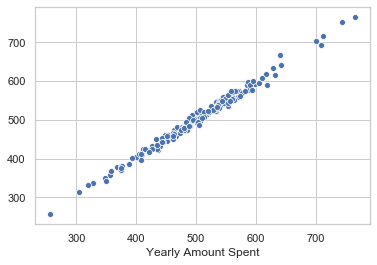

In [ ]:
sns.scatterplot(y_test,pred)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE:',mean_absolute_error(pred,y_test) )
print('MSE:', mean_squared_error(pred,y_test))
print('RMSE:',np.sqrt(mean_squared_error(pred,y_test)))

MAE: 7.228148653430853
MSE: 79.81305165097487
RMSE: 8.933815066978656


In [ ]:
Residuals = (y_test-pred)

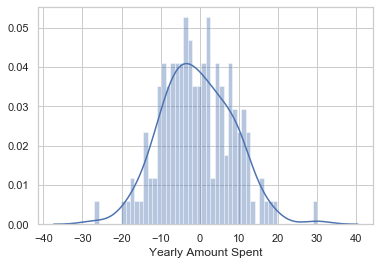

In [ ]:
sns.distplot(Residuals,bins=50)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


The company should focus more on Mobile App, because it yields more Income